In [20]:
import sys 
sys.path.insert(-1,"../")
from mazeAgentUtils import *
import scipy 
%load_ext autoreload
%autoreload 2
tpl.setColorscheme(colorscheme=2)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


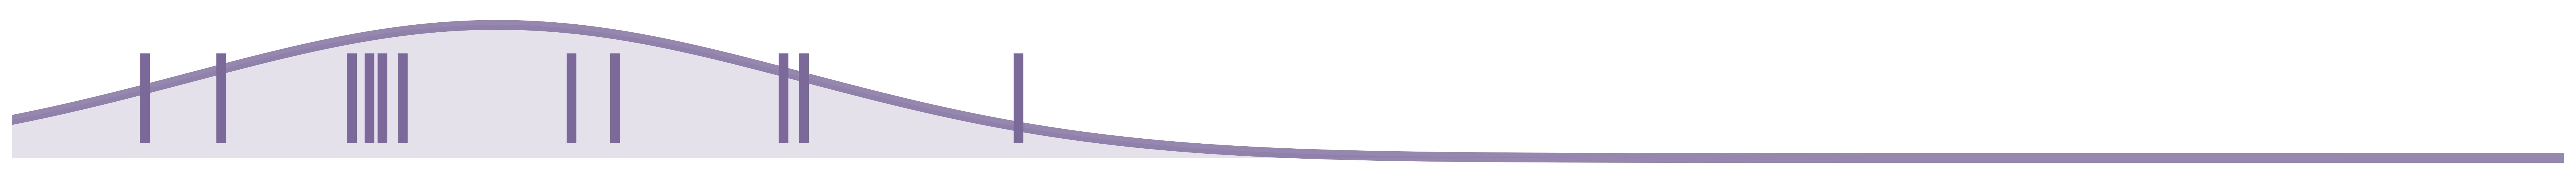

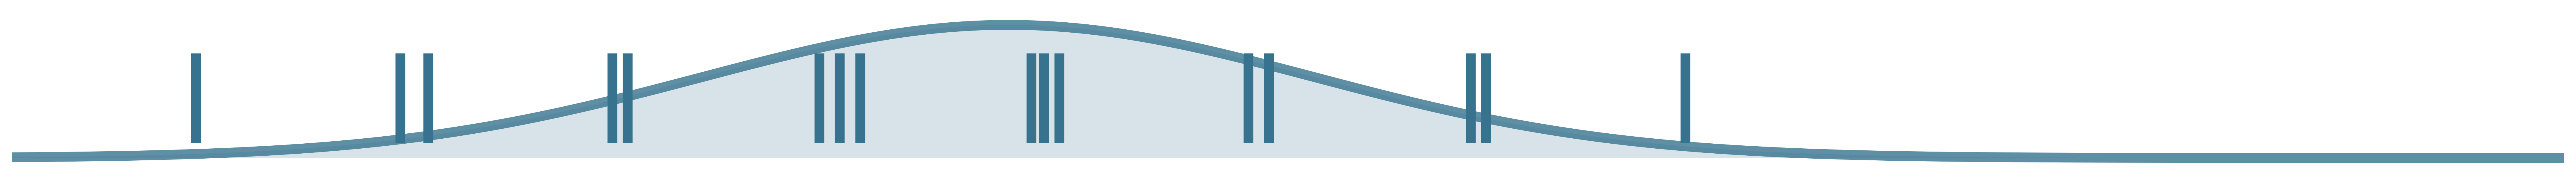

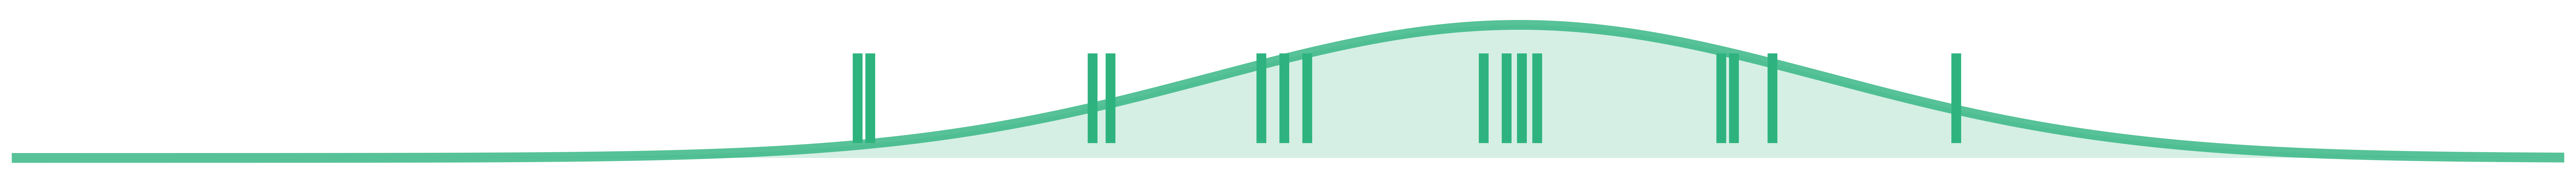

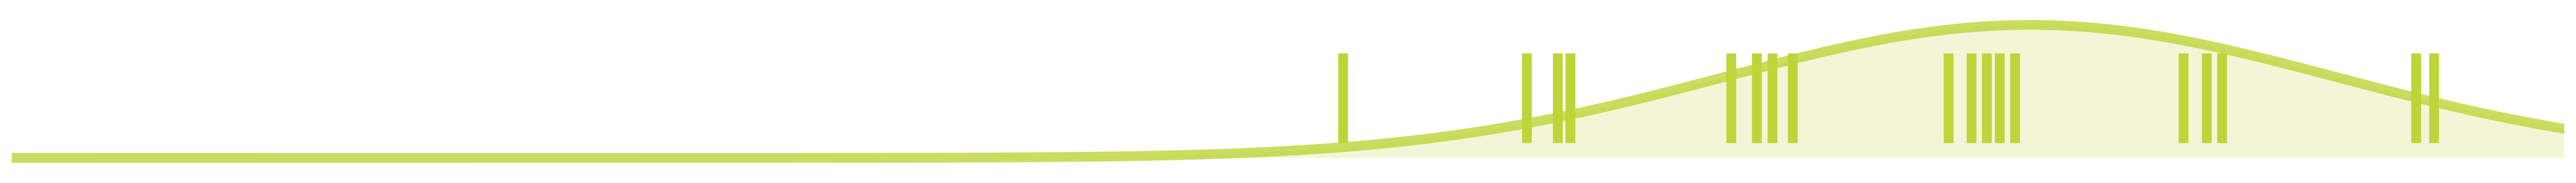

In [34]:
data = [['C0',2.3,10.1,0,10],['C1',4.8,7.5,1,20],['C2',7.5,4.8,2,30],['C3',10.3,2.2,3,40]]
plotsigma = 1.2
truesigma = plotsigma * 2.4
precessfrac = 0.9
kappa = 5
dx = 0.01
scale = 50
X = np.arange(0,10,dx)
for datum in data:
    mean = 10 * datum[1] / (datum[1] + datum[2])
    mean = 10 * (datum[4]-0.5)/50
    Y = np.exp(-(X-mean)**2/(2*plotsigma**2))
    fig, ax = plt.subplots(figsize=(28,1.8))
    ax.plot(X,Y,linewidth=6,alpha = 0.8,c=datum[0])
    ax.fill_between(X,Y,0,alpha=0.2,facecolor=datum[0])
    ax.set_ylim(-0.1,1.1)
    lastspiketime=0
    for (x,y) in zip(X,Y):
        phase = ( ( x % (10/11) ) / (10/11) ) * 2 * np.pi
        sigmatomiddle = max(-1,min(1,( mean - x ) / (2*truesigma))) 
        preferredphase = np.pi + sigmatomiddle * precessfrac * np.pi
        phasediff = phase - preferredphase
        modulation = vonmises.pdf(phasediff,kappa=kappa) / scipy.stats.vonmises.pdf(0,kappa=kappa)
        fr = modulation * y
        pfire = fr * dx * scale
        if (np.random.poisson(pfire) > 0) and (x-lastspiketime) > 0.045: 
            ax.plot([x,x],[0.15,0.75],c=datum[0], linewidth=6)
            lastspiketime = x
    plt.axis('off')

    saveFigure(fig, 'gaussian',specialLocation = f"../figures/paperFigures/figure1/1_{datum[-1]+1}.svg")

'./figures220116/thetacycle_1730'

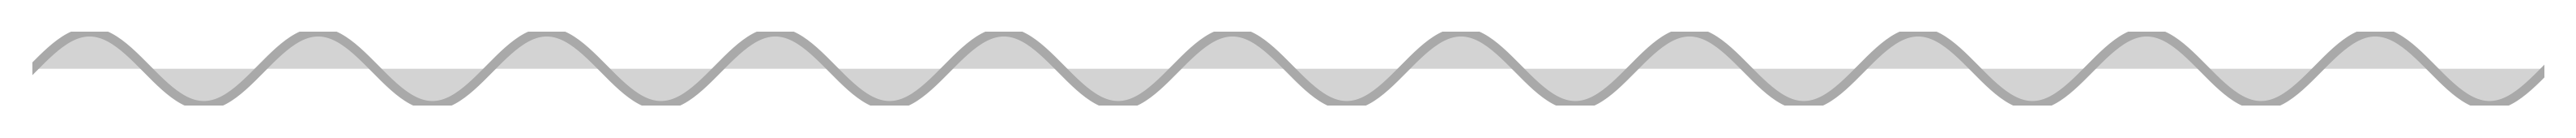

In [18]:
dx = 0.01
x = np.arange(0,11,dx)
fig, ax = plt.subplots(figsize=(10,0.3))
ax.plot(x,np.sin(2*np.pi*x),c='darkgrey')
# ax.fill_between(x,0,np.sin(2*np.pi*x),facecolor='darkgrey',alpha=0.5)
ax.axis('off')
tpl.xyAxes(ax)
tpl.saveFigure(fig,'thetacycle',specialLocation="../figures/paperFigures/figure1/1a.svg")

'../figures/211123/stdp_1804'

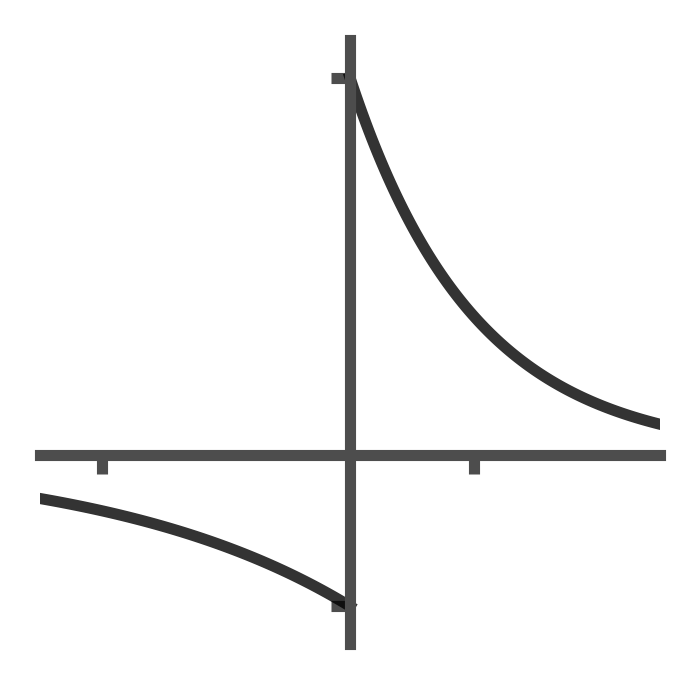

In [4]:

x_plus = np.linspace(0,50e-3,100)
x_minus = np.linspace(-50e-3,0,100)
asymm = -0.4
tplus = 20e-3
tminus = 40e-3
y_plus = np.exp(-x_plus/tplus)
y_minus = asymm*np.exp(x_minus/tminus)

fig, ax = plt.subplots(figsize=(2,2))
ax.plot(x_minus,y_minus,linewidth=2,alpha = 0.8,c='k')
ax.plot(x_plus,y_plus,linewidth=2,alpha = 0.8,c='k')
ax.set_ylim(-1.1,1.1)
i = 0
tpl.xyAxes(ax)
# for spine in ax.spines.values():
#     if i in [0,2]:
#         spine.set_color('darkgrey')
#         spine.set_linewidth(2)
#         spine.set_position('zero')
#     else: 
#         spine.set_color('none')
#     i += 1
ax.set_ylim(bottom = asymm-0.1,top=1+0.1)
ax.set_yticks([asymm, 1])
ax.set_yticklabels(['',''])
ax.set_xticks([-tminus,tplus])
ax.set_xticklabels(['',''])
saveFigure(fig,'stdp',specialLocation="../figures/paperFigures/figure1/1C.svg")

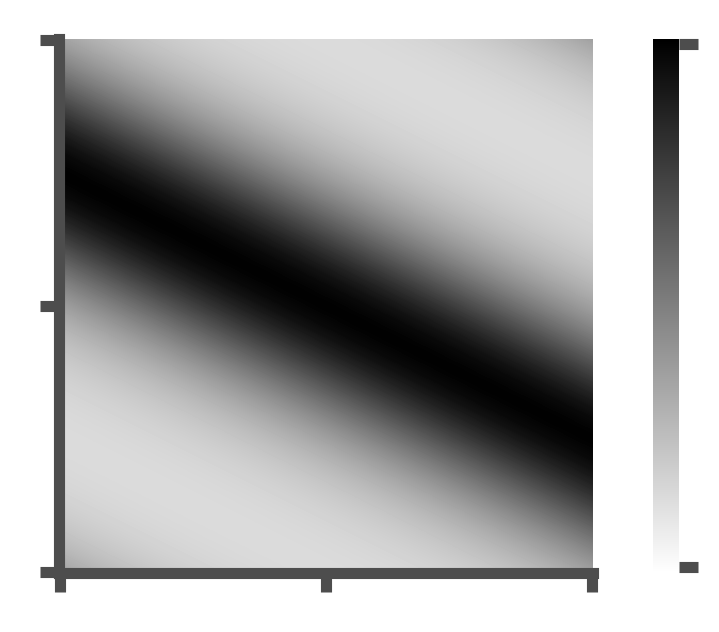

In [6]:
def phasePlane(kappa,precessFrac):
    x = np.linspace(-1,1,501)
    phase = np.linspace(0,2*np.pi,501)
    # y = np.pi - (2/3)*np.pi*x 
    phasePlane = np.empty(shape=(len(x),len(phase)))
    for (i,x_) in enumerate(x):
        preferredPhase = np.pi + x_ * precessFrac * np.pi
        phaseDiff = phase -  preferredPhase
        phasePlane[i,:] = vonmises.pdf(phaseDiff,kappa=kappa) / scipy.stats.vonmises.pdf(0,kappa=kappa)
    return phasePlane


def plotPhasePlane(phasePlane):
    fig, ax = plt.subplots()
    im = ax.imshow(phasePlane.T,cmap='binary',vmin=-0.01,vmax=1.01)
    # ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cb = fig.colorbar(im, cax=cax)
    cb.outline.set_visible(False)
    i = 0
    # tpl.xyAxes(ax)
    for spine in ax.spines.values():
        if i in [0,2]:
            # spine.set_color('darkgrey')
            spine.set_linewidth(2)
        else: 
            spine.set_color('none')
        i += 1
    ax.set_xticks([0,250,500])
    ax.set_yticks([0,250,500])
    ax.set_xticklabels(['','',''])
    ax.set_yticklabels(['','',''])
    # ax.tick_params(axis='x', colors='darkgrey',width=2)
    # ax.tick_params(axis='y', colors='darkgrey',width=2)
    # cax.tick_params(axis='y',width=2,colors='darkgrey')
    cb.set_ticks([0,1])
    cb.set_ticklabels(['',''])
    saveFigure(fig,'preferredPhase',specialLocation="../figures/paperFigures/figure1/1B.svg")
    return fig, ax 


fig, ax = plotPhasePlane(phasePlane(1,0.5))

In [24]:
vonmises.pdf(0,kappa=2)

0.5158854120190137

best precess fraction = 0.698, besk kappa = 0.900


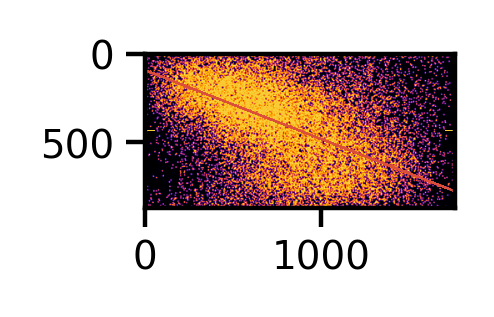

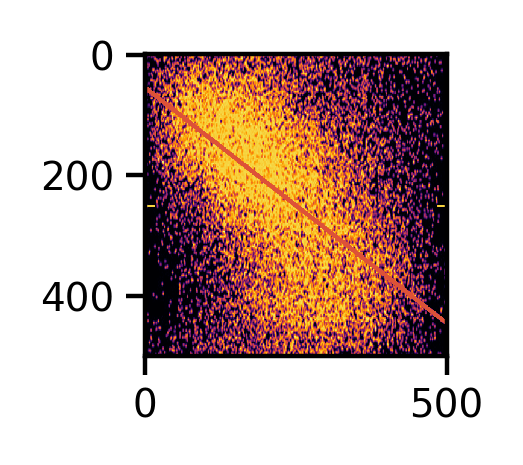

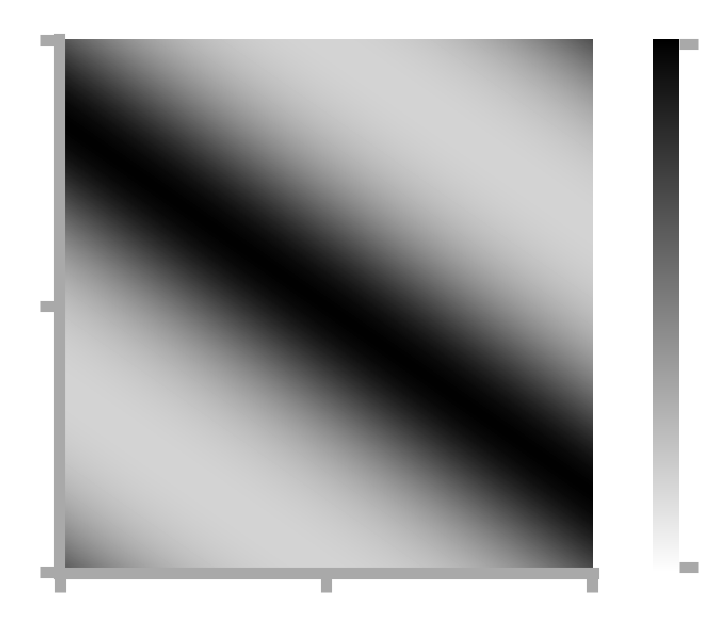

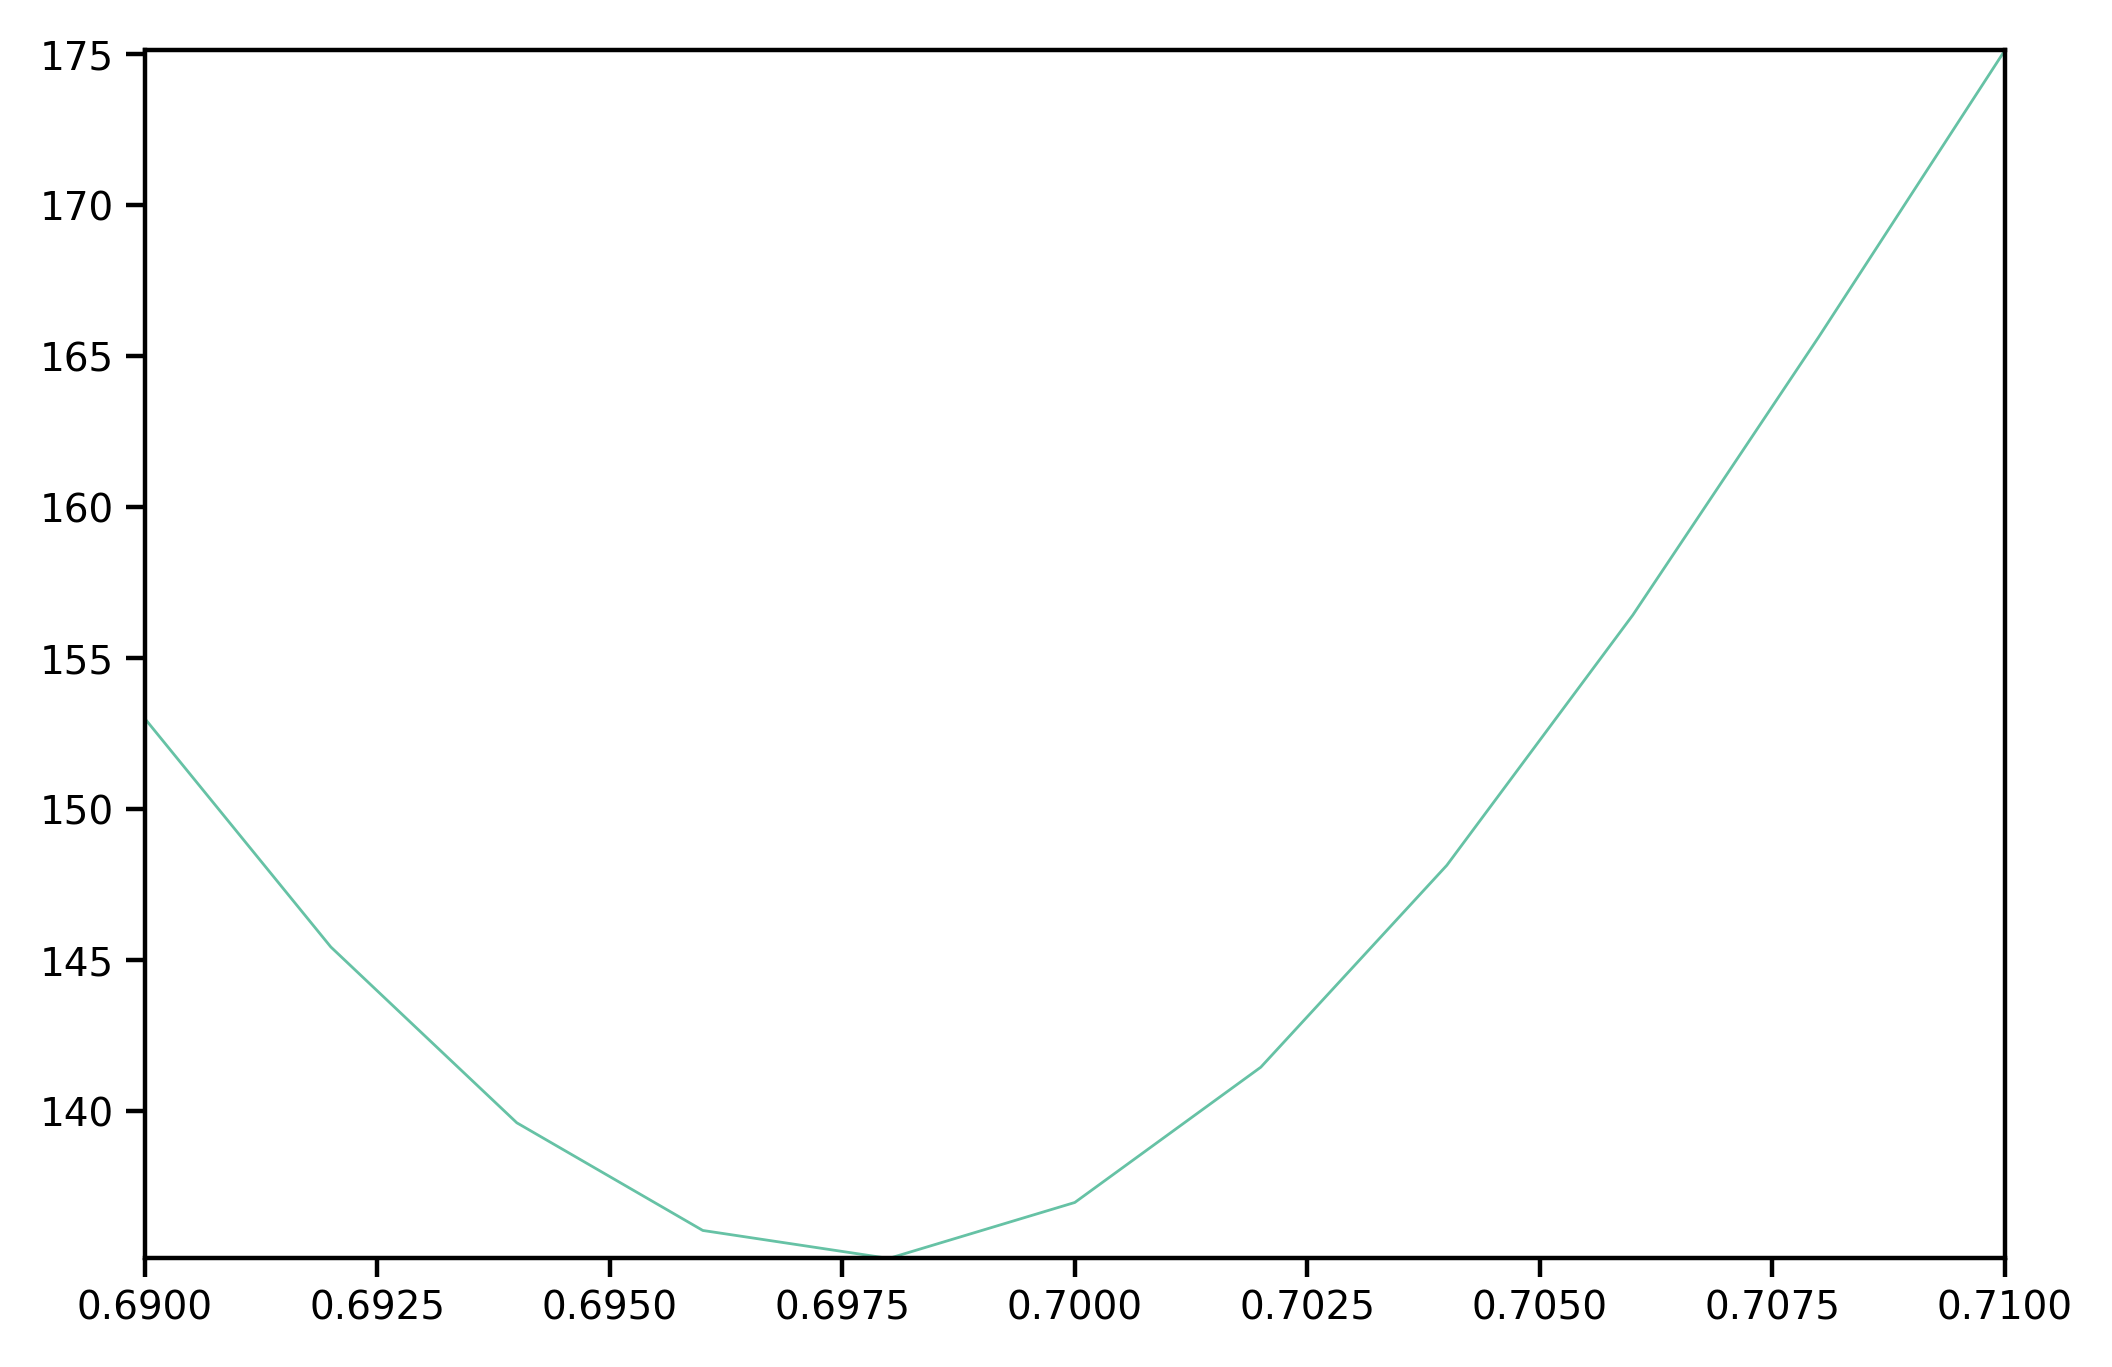

In [31]:
from PIL import Image
jeewajee = Image.open('../savedObjects/jeewajee.png').convert('L')
jeewajee = np.asarray(jeewajee)
jeewajee = (256 - jeewajee)/256
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(jeewajee)
jeewajee_new = np.empty((501,501))
for i in range(501):
    for j in range(501):
        jeewajee_new[i,j] = jeewajee[int(jeewajee.shape[0]*i/501),int(jeewajee.shape[1]*j/501)]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(jeewajee_new)

F = np.linspace(0.69,0.71,11)
K = np.linspace(0.1,3,30)
# loss = np.zeros((F.shape[0],K.shape[0]))
# for (i,f) in enumerate(F):
#     for (j,k) in enumerate(K):
#         phasePlane_ = phasePlane(k,f)
#         loss[i,j] = np.linalg.norm(phasePlane_.flatten() - jeewajee_new.flatten())
# bestids = np.unravel_index(loss.argmin(), loss.shape)
print("best precess fraction = %.3f, besk kappa = %.3f" %(F[bestids[0]],K[bestids[1]]))

plotPhasePlane(phasePlane(K[bestids[1]],F[bestids[0]]))
fig, ax = plt.subplots()
ax.plot(F,loss[:,np.argmin(np.abs(K-1))])

In [6]:
print(loss)

[[279.30021882 241.11023806 211.52170376 189.38120394 173.58531772
  163.03407495 156.64266835 153.39753318 152.41857618 152.99509802
  154.58754393 156.80568263 159.37760283 162.11940752 164.91001895
  167.67198409 170.35757385 172.9390164  175.40176049 177.73988251
  179.95297987 182.04408312 184.01826193 185.88170176 187.641099
  189.30327126 190.87491244 192.36244483 193.77193591 195.10905773]
 [278.39282805 239.20250422 208.55223933 185.34323198 168.54337988
  157.12285334 150.0444     146.30796416 145.01710365 145.42830299
  146.96562977 149.20658201 151.85382354 154.70476671 157.62515608
  160.52848614 163.36091684 166.09060867 168.70034266 171.18248029
  173.5355506  175.76195389 177.86642595 179.85501801 181.73442594
  183.51155509 185.19324411 186.78609545 188.29637723 189.72997228]
 [277.76500383 237.8646356  206.44031556 182.42928786 164.85167396
  152.73488894 145.0867479  140.92731069 139.35467764 139.60340171
  141.07003054 143.30631531 145.99407623 148.91517891 151.9243

In [42]:
np.meshgrid(F,K)

[array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
        [0.30714286, 0.30714286, 0.30714286, 0.30714286, 0.30714286],
        [0.51428571, 0.51428571, 0.51428571, 0.51428571, 0.51428571],
        [0.72142857, 0.72142857, 0.72142857, 0.72142857, 0.72142857],
        [0.92857143, 0.92857143, 0.92857143, 0.92857143, 0.92857143],
        [1.13571429, 1.13571429, 1.13571429, 1.1

In [34]:
np.array([[1,2],[3,4]]).flatten()

array([1, 2, 3, 4])

'../figures/220302/bindingTD_1800'

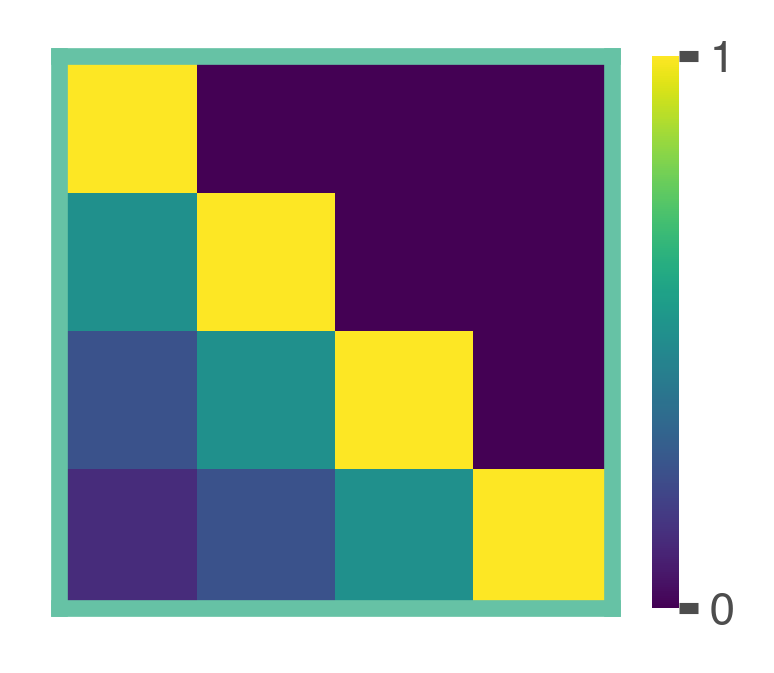

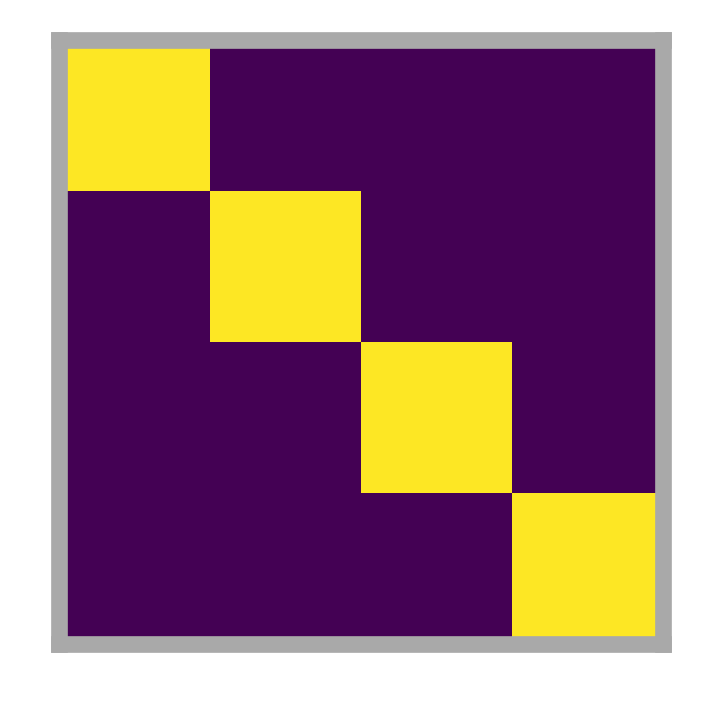

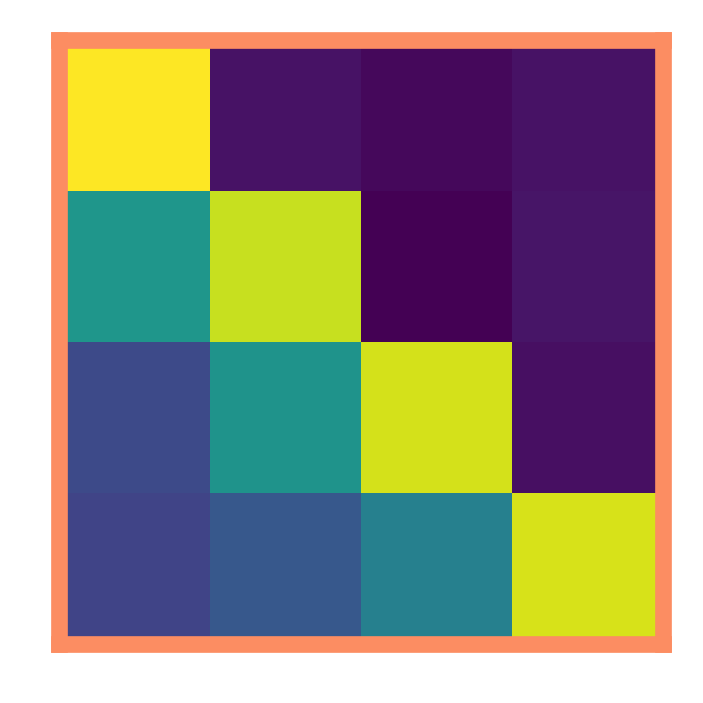

In [16]:
tpl.setColorscheme(1)

binding = np.array([[1,0,0,0],[0.5,1,0,0],[0.25,0.5,1,0],[0.125,0.25,0.5,1]])
fig, ax = plt.subplots(figsize=(2,2))
im = ax.imshow(binding,cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = fig.colorbar(im, cax=cax, ticks=[0,1])
cb.outline.set_visible(False)



# plt.axis('off')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(3)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig, 'binding',specialLocation="../figures/paperFigures/figure1/1Di.svg")

binding = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
fig, ax = plt.subplots(figsize=(2,2))
im = ax.imshow(binding,cmap='viridis')
# plt.axis('off')
for spine in ax.spines.values():
    spine.set_color('darkgrey')
    spine.set_linewidth(3)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig, 'binding',specialLocation="../figures/paperFigures/figure1/1Dii.svg")

binding = np.array([[1,0,0,0],[0.5,1,0,0],[0.25,0.5,1,0],[0.125,0.25,0.5,1]])
binding += np.random.normal(scale=0.05,size=binding.shape)
fig, ax = plt.subplots(figsize=(2,2))
im = ax.imshow(binding,cmap='viridis')
# plt.axis('off')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(3)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig, 'bindingTD',specialLocation="../figures/paperFigures/figure1/1E.svg")